In [1]:
# Code by PRATHISH  MURUGAN
# 29 April 2020

#Pima-Indians-Diabetes

#This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.  
#he datasets consist of several medical predictor (independent) variables and 
#one target (dependent) variable, Outcome. 
#Independent variables include the number of pregnancies the patient has had, their BMI, 
#insulin level, age, and so on.

#This dataset can be found here -> https://www.kaggle.com/uciml/pima-indians-diabetes-database

#Acknowledgements :-
#Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). 
#Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. 
#In Proceedings of the Symposium on Computer Applications and 
#Medical Care (pp. 261--265).IEEE Computer Society Press.

#This is a classifiaction problem and the dataset is not clean

#This problem looks easy bit it gets hard because of the unclean and unclean dataset 

In [2]:
import pandas as pd                     #data processing
import numpy as np                      #liner algebra
import matplotlib.pyplot as plt         #graphs
import seaborn as sns                   #visualizations


In [3]:
#Imporing the CSV dataset
pima_main=pd.read_csv(r"C:\Users\hp\Desktop\spyder\diabetes.csv",na_values=['??','????'])

#Making a copy of the original dataset for working
pima_work=pima_main.copy(deep=True)

print(pima_work.head())
print(pima_work.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [4]:
pima_work.describe()   # Gives the basic mean,meadian and quantas og each columns
#Note atleast 25% of readings for insulin and skinthickness are 0. Min readings 
#for columns like Glucose, Bloodpressure and BMI are zero too which does not seem appropriate

pima_main.info()
pima_work.isnull().sum()     #to check any null values in any columns
#There are no null values in the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#Now we have to check if there are any 0's in the set
pima_work.isin([0]).sum()
# Seems like there are a lot of zeros and 0's in glucose,BP,BMI is not logical
#We need to fill these 0's with some appropirate values

pima_work.Outcome.value_counts()
#Seems like the Outcome is not Balanced

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
# replace all zeros with NANs. I do this so that when means are calculated, zeros are not counted.
pima_nan = pima_work.replace({
            'Glucose': 0,
            'BloodPressure' : 0,
            'SkinThickness' : 0,
            'BMI' : 0 ,
            'Insulin' : 0,
        },np.NaN)                     


pima_nan.isin([0]).sum()


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
#We have replaced all the unwanted 0's with NaN 
#Calcutating the mean of each columns
pima_nan.mean()
pima_nan.median()
#Now we will try to replace this NaN with mean or median
pima_nan.isnull().sum()
pima_nan=pima_nan.fillna(pima_nan.mean())
pima_nan.isnull().sum()
#Now we have filled the NaN values with the mean of each coloums

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#shuffle the dataset
from sklearn.utils import shuffle
pima_nan = shuffle(pima_nan)

# I want to see how the imputation process has affected these values. 
# I will follow this up with some visualizations.

pima_nan.groupby('Outcome').mean().transpose()

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,110.710121,142.165573
BloodPressure,70.935397,75.147324
SkinThickness,27.768651,31.736944
Insulin,142.210761,180.431548
BMI,30.888434,35.384757
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


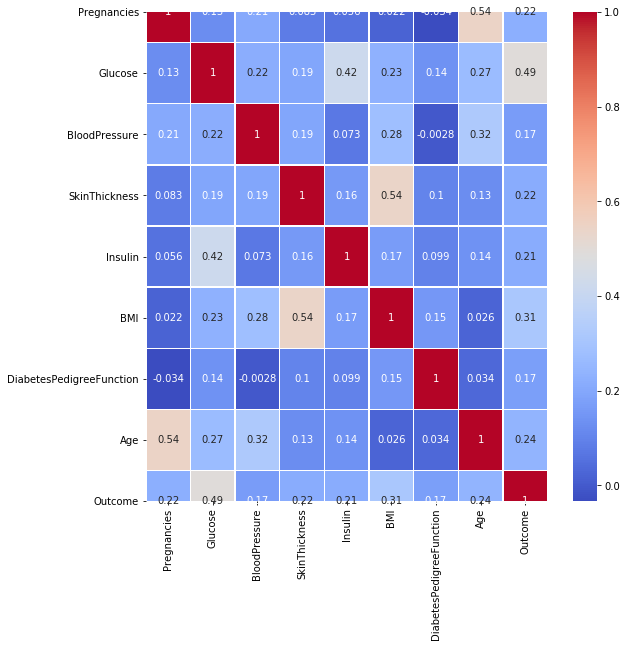

In [9]:
#Now we see the correlation bettween the each of the features
pima_corr=pima_nan.corr()

#Creating a Heatmap
plt.figure(figsize=(9,9))
sns.heatmap(pima_corr,cmap='coolwarm',annot=True,linewidths = 0.5)

#From this heatmap we can see that Glucose is having the greatest
#effect on outcome followed by BMI which is self-explanatory.

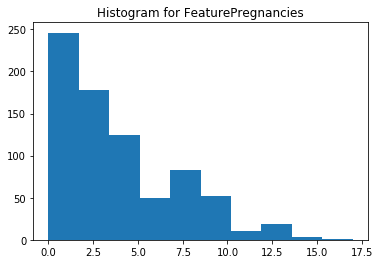

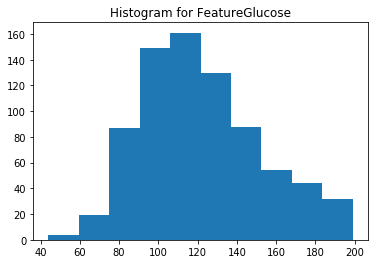

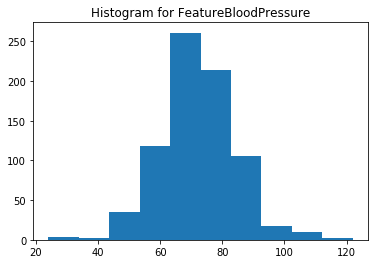

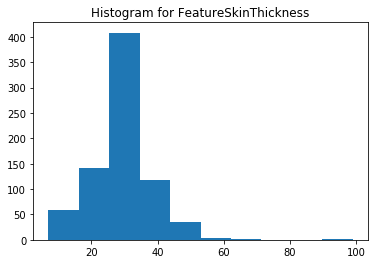

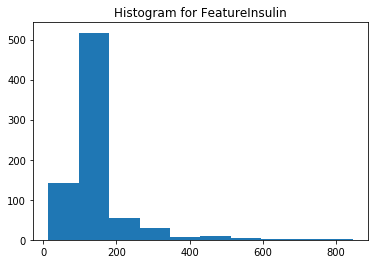

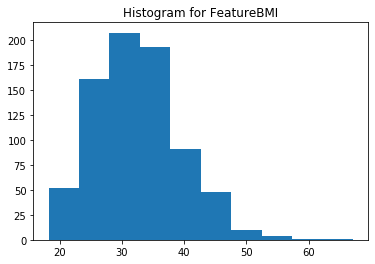

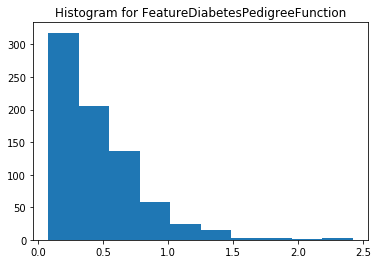

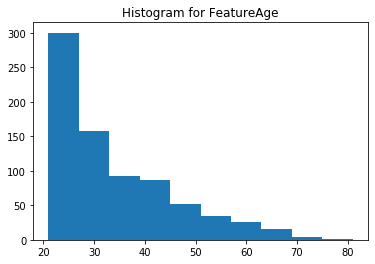

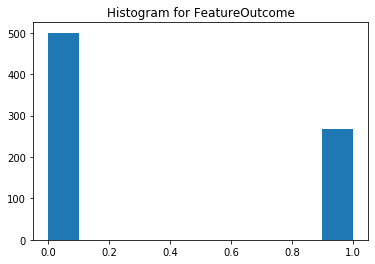

In [10]:
# Histograms for imputed data.

for cols in pima_nan.columns:
    x = pima_nan.loc[:,cols]
    plt.hist(x)
    plt.title('Histogram for Feature' +str(cols))
    plt.show()
# End of Visualizations

In [15]:
#Creating a test and train DF    
X=pima_nan.drop('Outcome',axis=1)
y=pima_nan['Outcome'].values

In [17]:
#Let's split the data randomly into training and test set
    #importing train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [18]:
#ML MODELS

# MODEL 1 :- KNN CLASSIFICATION

#Create-KNN-model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 60)       #n_neighbors = K value

#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = KNN, X= X_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

#The values I got for KNN at the time of coding is 
#Average Accuracies:  0.7664285714285715
#Standard Deviation Accuracies:  0.09502140527437733 

Average Accuracies:  0.7165686274509804
Standart Deviation Accuracies:  0.08800673010858887


In [19]:
KNN.fit(X_train,y_train) #learning model
KNN.score(X_test, y_test)

#The score I got while writing the score 
#Score :-  0.751219512195122

0.7544715447154472

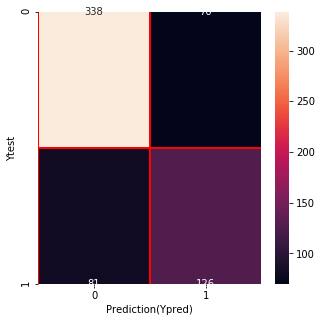

In [20]:
y_predict = KNN.predict(X_test)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,y_predict)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytest")
plt.show()

In [21]:
# MODEL 2 :- SVM

#Create SVM Model
from sklearn.svm import SVC

SVM = SVC(random_state=42)

#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= X_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standard Deviation Accuracies: ",np.std(accuraccies))

#The values I got for SVM at the time of coding is 
#Average Accuracies:  0.6410714285714286
#Standard Deviation Accuracies:  0.018064274887492272

Average Accuracies:  0.6013235294117646
Standard Deviation Accuracies:  0.008636498152956484


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The defa

In [22]:
SVM.fit(X_train,y_train)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(X_test,y_test))

SVMscore = SVM.score(X_test,y_test)
# Score :-  0.6536585365853659

SVM Accuracy: 0.6634146341463415


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


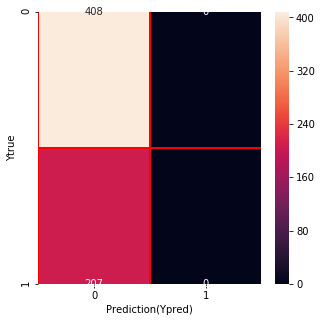

In [23]:
#Confusion Matrix

yprediciton3= SVM.predict(X_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton3)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [24]:
# So this is a machine learning model to accurately predict whether or not the
# patients in the dataset have diabetes or not

# Hope you find it useful
# Corections and suggestions are welcomed

# BY PRATHISH MURUGAN
# 29 - APRIL - 2020